In [ ]:
# reference & raw data : https://www.kaggle.com/drscarlat/compare-6-unsupervised-anomaly-detection-models

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
import warnings

In [3]:
warnings.filterwarnings(action="ignore")

In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [7]:
df = pd.read_csv('creditcard.csv')

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

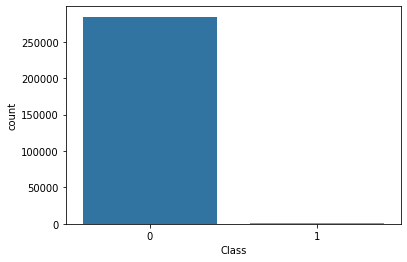

0    284315
1       492
Name: Class, dtype: int64


In [11]:
sns.countplot(df.Class)
plt.show()
print(df.Class.value_counts())

In [12]:
timedelta = pd.to_timedelta(df['Time'], unit = 's')

In [13]:
timedelta

0        0 days 00:00:00
1        0 days 00:00:00
2        0 days 00:00:01
3        0 days 00:00:01
4        0 days 00:00:02
               ...      
284802   1 days 23:59:46
284803   1 days 23:59:47
284804   1 days 23:59:48
284805   1 days 23:59:48
284806   1 days 23:59:52
Name: Time, Length: 284807, dtype: timedelta64[ns]

In [14]:
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

In [15]:
df['Time_hour']

0          0
1          0
2          0
3          0
4          0
          ..
284802    23
284803    23
284804    23
284805    23
284806    23
Name: Time_hour, Length: 284807, dtype: int32

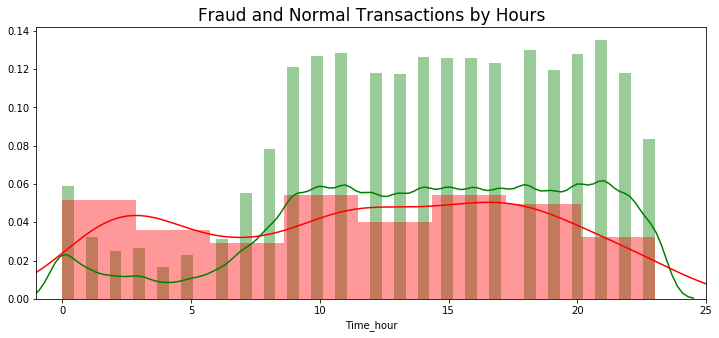

In [16]:
plt.figure(figsize = (12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], color='r')
plt.title("Fraud and Normal Transactions by Hours", fontsize = 17)
plt.xlim([-1,25])
plt.show()

In [18]:
cols = df[['Time', 'Amount']]


In [19]:
cols

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [20]:
pca = PCA()


In [21]:
pca.fit(cols)

PCA()

In [22]:
X_PCA = pca.transform(cols)

In [24]:
X_PCA

array([[ 9.48138628e+04,  5.59785673e+01],
       [ 9.48138546e+04, -9.09514325e+01],
       [ 9.48128756e+04,  2.85018623e+02],
       ...,
       [-7.79741414e+04, -1.61176753e+01],
       [-7.79741447e+04, -7.39976752e+01],
       [-7.79781331e+04,  1.33002548e+02]])

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


In [26]:
df['V29'] = X_PCA[:,0]
df['V30'] = X_PCA[:,1]

In [27]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_hour', 'V29', 'V30'],
      dtype='object')

In [28]:
columns = df.drop('Class', axis = 1).columns

In [29]:
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_hour', 'V29', 'V30'],
      dtype='object')

In [32]:
len(columns)

33

IndexError: index 25 is out of bounds for GridSpec with size 25

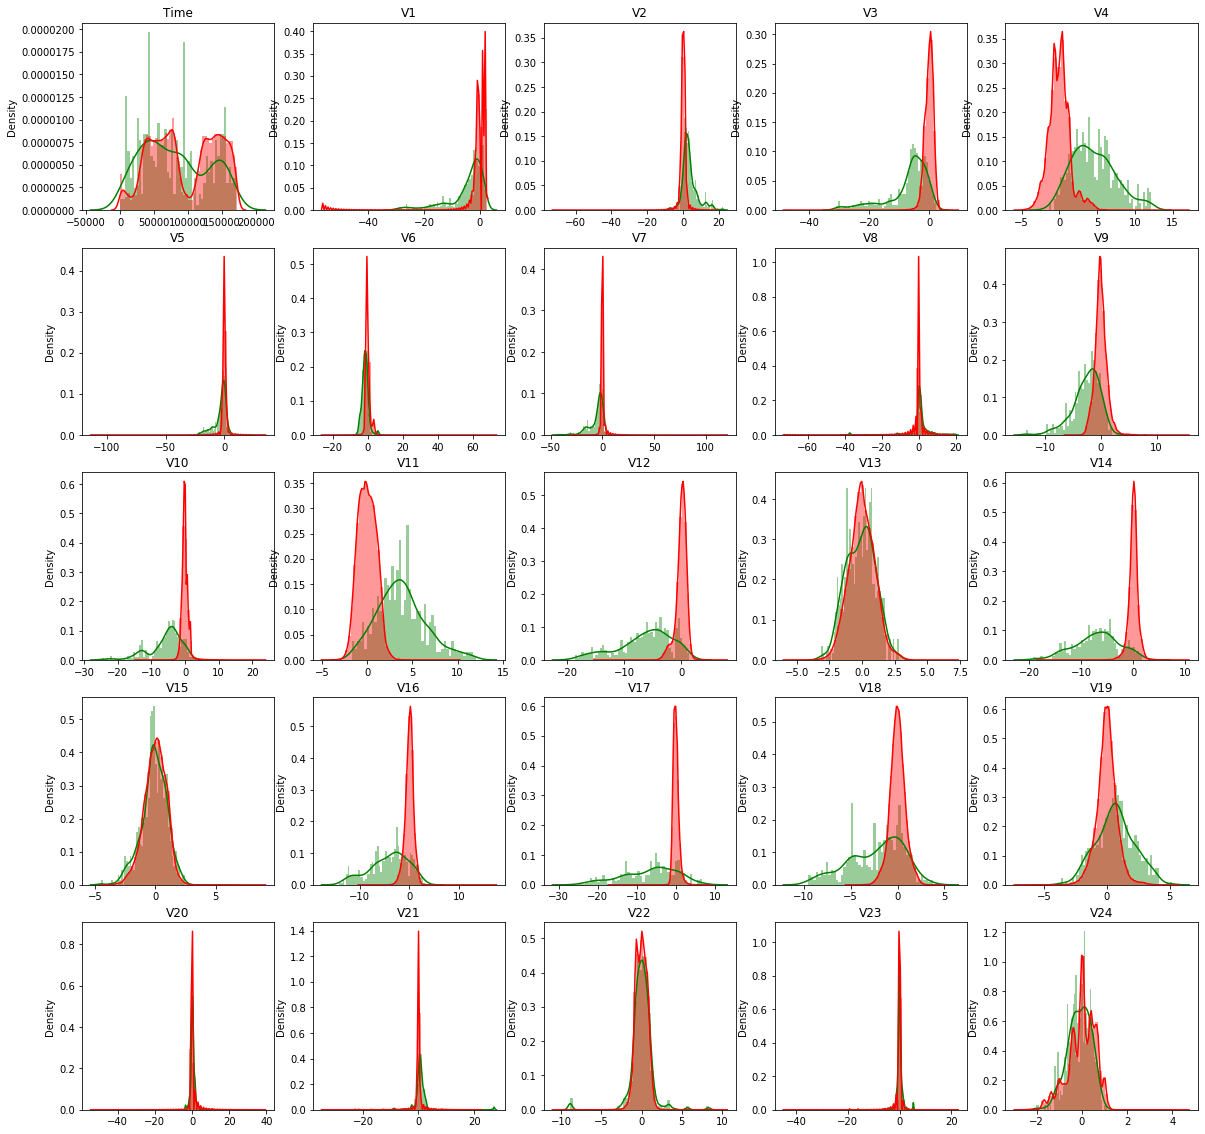

In [39]:
columns = df.drop('Class', axis=1).columns
grid = gridspec.GridSpec(5, 5)

plt.figure(figsize=(20,10*2))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[df.Class==1][col], bins = 50, color='g')
    sns.distplot(df[df.Class==0][col], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    
plt.show()

In [43]:
def ztest(feature):
    
    mean = normal[feature].mean()
    std = fraud[feature].std()
    zScore = (fraud[feature].mean()-mean) / (std/np.sqrt(sample_size))
    
    return zScore

In [45]:
columns = df.drop('Class', axis = 1).columns
normal = df[df.Class ==0]
fraud = df[df.Class ==1]
sample_size = len(fraud)
significant_features=[]
critical_value = 2.58

for i in columns:
    
    z_vavlue = ztest(i)
    
    if (abs(z_vavlue) >= critical_value):
        print(i, " is statistically significant")
        
        significant_features.append(i)
        
    else:
        print(i)

Time  is statistically significant
V1  is statistically significant
V2  is statistically significant
V3  is statistically significant
V4  is statistically significant
V5  is statistically significant
V6  is statistically significant
V7  is statistically significant
V8
V9  is statistically significant
V10  is statistically significant
V11  is statistically significant
V12  is statistically significant
V13
V14  is statistically significant
V15
V16  is statistically significant
V17  is statistically significant
V18  is statistically significant
V19  is statistically significant
V20  is statistically significant
V21  is statistically significant
V22
V23
V24  is statistically significant
V25
V26
V27  is statistically significant
V28  is statistically significant
Amount  is statistically significant
Time_hour  is statistically significant
V29  is statistically significant
V30  is statistically significant


In [46]:
significant_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V27',
 'V28',
 'Amount',
 'Time_hour',
 'V29',
 'V30']

In [47]:
significant_features.append('Class')

In [48]:
significant_features

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V24',
 'V27',
 'V28',
 'Amount',
 'Time_hour',
 'V29',
 'V30',
 'Class']

In [49]:
df = df[significant_features]

In [50]:
inliers = df[df.Class==0]

In [51]:
inliers

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V20,V21,V24,V27,V28,Amount,Time_hour,V29,V30,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62,0,94813.862847,55.978567,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69,0,94813.854647,-90.951433,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66,0,94812.875630,285.018623,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50,0,94812.861389,29.858623,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99,0,94811.858403,-23.651321,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,1.475829,0.213454,-0.509348,0.943651,0.823731,0.77,23,-77972.145192,-83.227787,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0.059616,0.214205,-1.016226,0.068472,-0.053527,24.79,23,-77973.143851,-59.207731,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0.001396,0.232045,0.640134,0.004455,-0.026561,67.88,23,-77974.141446,-16.117675,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,0.127434,0.265245,0.123205,0.108821,0.104533,10.00,23,-77974.144676,-73.997675,0


In [52]:
ins = inliers.drop(['Class'], axis = 1)

In [53]:
ins

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V19,V20,V21,V24,V27,V28,Amount,Time_hour,V29,V30
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62,0,94813.862847,55.978567
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69,0,94813.854647,-90.951433
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66,0,94812.875630,285.018623
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50,0,94812.861389,29.858623
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99,0,94811.858403,-23.651321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,-0.682920,1.475829,0.213454,-0.509348,0.943651,0.823731,0.77,23,-77972.145192,-83.227787
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,-1.016226,0.068472,-0.053527,24.79,23,-77973.143851,-59.207731
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.640134,0.004455,-0.026561,67.88,23,-77974.141446,-16.117675
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.123205,0.108821,0.104533,10.00,23,-77974.144676,-73.997675


In [57]:
outliers = df[df.Class==1]
outs = outliers.drop(['Class'], axis = 1)

In [58]:
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V20,V21,V24,V27,V28,Amount,Time_hour,V29,V30,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,-2.770089,-2.772272,...,0.126911,0.517232,0.320198,0.261145,-0.143276,0.00,0,94407.854497,-93.618773,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.270953,-0.838587,...,2.102339,0.661696,-0.293803,-0.252773,0.035764,529.00,0,94341.884022,435.384910,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.087330,0.039566,-0.153029,239.93,1,90351.867894,146.537603,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.247768,-4.801637,...,-0.171608,0.573574,-0.053502,-0.827136,0.849573,59.00,1,87827.857800,-34.251525,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-1.282858,-2.447469,...,0.009061,-0.379068,-1.632653,-0.010016,0.146793,1.00,2,87294.854564,-92.221777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,-2.064945,-5.587794,...,1.252967,0.778584,-0.294885,0.292680,0.147968,390.00,22,-74328.123473,305.798831,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,-1.127396,-3.232153,...,0.226138,0.370612,-0.081049,0.389152,0.186637,0.76,23,-74533.145197,-83.429727,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,-0.652250,-3.463891,...,0.247968,0.751826,0.032070,0.385107,0.194361,77.89,23,-74537.140893,-6.299503,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,-1.632333,-5.245984,...,0.306271,0.583276,-0.183659,0.884876,-0.253700,245.00,23,-75152.131565,160.844821,1


In [59]:
ins.shape, outs.shape

((284315, 26), (492, 26))

In [60]:
def normal_accuracy(values):
    
    tp = list(values).count(1)
    total = values.shape[0]
    accuracy = np.round(tp/total, 4)
    
    return accuracy  

In [61]:
def fraud_accuracy(values):
    
    tn = list(values).count(-1)
    total = values.shape[0]
    accuracy = np.round(tn/total,4)
    
    return accuracy

In [62]:
state = 42

In [63]:
ISF = IsolationForest(random_state = state)
ISF.fit(ins)

IsolationForest(random_state=42)

In [64]:
normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

In [65]:
in_accuracy_isf = normal_accuracy(normal_isf)
out_accuracy_isf = fraud_accuracy(fraud_isf)

print("Accuracy in Detecting Normal Cases:", in_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_isf)

Accuracy in Detecting Normal Cases: 0.9518
Accuracy in Detecting Fraud Cases: 0.8537


In [66]:
LOF = LocalOutlierFactor(novelty = True)
LOF.fit(ins)

LocalOutlierFactor(novelty=True)

In [67]:
normal_lof = LOF.predict(ins)
fraud_lof = LOF.predict(out)

in_accuracy_lof = normal_accuracy(normal_lof)
out_accuracy_lof = fraud_accuracy(fraud_lof)
print("Accuracy in Detecting Normal Cases : ", in_accuracy_lof)
print("Accuracy in Detecting Fraud Cases : ", out_accuracy_lof)

Accuracy in Detecting Normal Cases :  0.988
Accuracy in Detecting Fraud Cases :  0.124


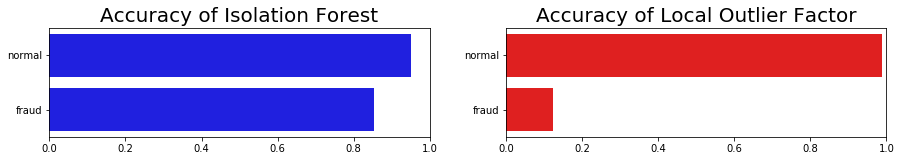

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [15,2])

ax1.set_title("Accuracy of Isolation Forest", fontsize = 20)
sns.barplot(x=[in_accuracy_isf, out_accuracy_isf],
           y = ['normal', 'fraud'],
           label = "classifiers",
           color="b",
           ax=ax1)
ax1.set(xlim=(0,1))

ax2.set_title("Accuracy of Local Outlier Factor", fontsize = 20)
sns.barplot(x = [in_accuracy_lof, out_accuracy_lof],
           y = ['normal', 'fraud'],
           label = "classifiers",
           color="r",
           ax = ax2)
ax2.set(xlim = (0,1))
plt.show()

In [69]:
import numpy as np
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import ticker, cm
from matplotlib.pyplot import figure
import seaborn as sns

In [70]:
from scipy.stats import multivariate_normal

In [71]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.decomposition import PCA

In [74]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

In [76]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [77]:
dfRaw = pd.read_csv('creditcard.csv')
print(dfRaw.shape)
print(dfRaw.columns)

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [78]:
data = dfRaw.copy()

In [79]:
normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

In [80]:
print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)


data  (284807, 31)
normal_data  (284315, 31)
fraud_data  (492, 31)


In [83]:
print("Percent fraud ", round(100*492/284807, 3),"%")
print("_"*100)


Percent fraud  0.173 %
____________________________________________________________________________________________________


In [82]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


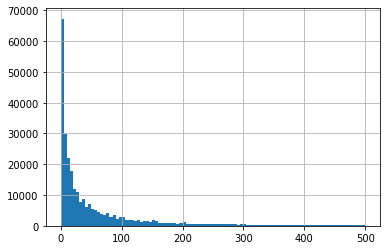

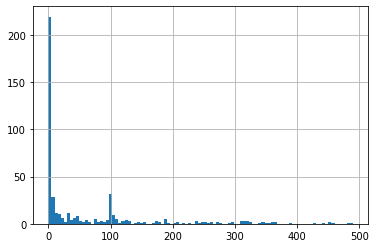

Mean 88.29102242225574 122.21132113821133
Median 22.0 9.25


In [89]:
normal_data['Amount'].loc[normal_data['Amount'] <500].hist(bins=100)
plt.show()
fraud_data["Amount"].loc[fraud_data["Amount"] < 500].hist(bins=100)
plt.show()
print("Mean", normal_data["Amount"].mean(), fraud_data["Amount"].mean())
print("Median", normal_data["Amount"].median(), fraud_data["Amount"].median())

<Figure size 432x288 with 0 Axes>

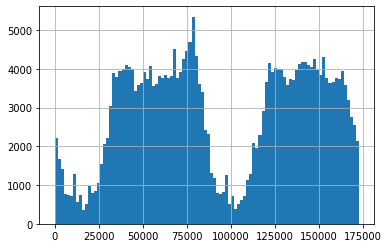

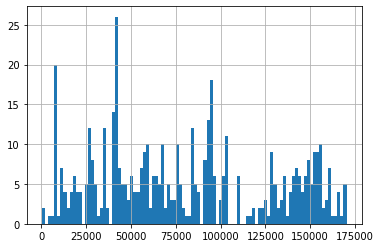

<Figure size 432x288 with 0 Axes>

In [90]:
normal_data["Time"].hist(bins=100);
plt.figure()
fraud_data["Time"].hist(bins=100);
plt.figure()

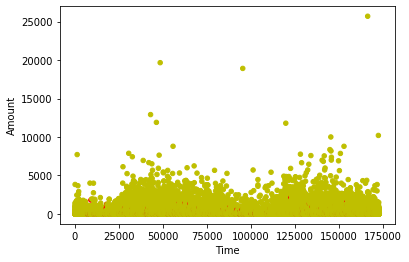

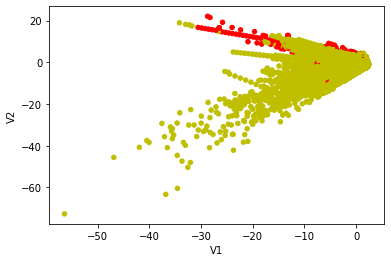

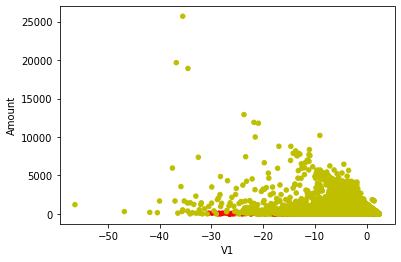

In [94]:
colors = np.where(data["Class"]==1,'r','y')

data.plot.scatter("Time","Amount", c=colors) 
data.plot.scatter("V1","V2", c=colors) 
data.plot.scatter("V1","Amount", c=colors)
plt.show()

In [96]:
data = dfRaw.copy()
scl = StandardScaler()

In [97]:
all_cols = list(data)[:]

In [98]:
all_cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [101]:
pca_columns = list(data)[:-1]

In [108]:
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)

In [109]:
OnlyClass = data['Class'].values.reshape(-1,1)

In [110]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [111]:
data = np.concatenate((Xscaled, OnlyClass), axis=1)

In [112]:
data

array([[-1.99658302, -0.69424232, -0.04407492, ..., -0.06378115,
         0.24496426,  0.        ],
       [-1.99658302,  0.60849633,  0.16117592, ...,  0.04460752,
        -0.34247454,  0.        ],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.18102083,
         1.16068593,  0.        ],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ..., -0.0804672 ,
        -0.0818393 ,  0.        ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.31668678,
        -0.31324853,  0.        ],
       [ 1.64205773, -0.27233093, -0.11489898, ...,  0.04134999,
         0.51435531,  0.        ]])

In [113]:
data.shape

(284807, 31)

In [114]:
data = pd.DataFrame(data, columns = XcopyALL.columns)

In [115]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0.0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0.0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0.0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0.0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0.0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0.0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0.0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0.0


In [116]:
normal_data = data.loc[data["Class"]==0]
fraud_data = data.loc[data["Class"]==1]

In [117]:
print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)

data  (284807, 31)
normal_data  (284315, 31)
fraud_data  (492, 31)


In [118]:
print("Percent fraud ", round(100*492/284807, 4),"%")

Percent fraud  0.1727 %


In [119]:
print("data['Time'].mean()  ", data['Time'].mean())
print("data['Amount'].mean()  ", data['Amount'].mean())

data['Time'].mean()   -1.0503786406559267e-14
data['Amount'].mean()   3.202236423019539e-16


In [120]:
normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

In [121]:
num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

In [122]:
X_train

array([[-1.6911589 ,  0.66619881,  0.00709956, ..., -0.16408763,
        -0.02754838, -0.293458  ],
       [ 0.69129248,  0.65498349, -0.5552245 , ..., -0.13243933,
         0.12380107,  1.15264977],
       [ 1.00745614,  0.99463714, -0.93390622, ..., -0.08195241,
        -0.12431485,  0.16252373],
       ...,
       [-0.57569962, -0.13754235,  0.66677563, ...,  0.60458119,
         0.26624575, -0.34247454],
       [-0.51168353,  0.60116726,  0.1319504 , ..., -0.03125221,
         0.04621687, -0.31328851],
       [ 1.10613357, -0.64937062, -0.47370215, ..., -0.03862883,
        -0.45376174, -0.22936868]])

In [123]:
X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])

In [125]:
X_test.shape

(75492, 30)

In [126]:
y_test.shape

(75492,)

In [127]:
y_test

array([0., 0., 0., ..., 1., 1., 1.])

In [128]:
print("normal_pca_data ", normal_pca_data.shape)
print("fraud_pca_data", fraud_pca_data.shape)
print("Fraud data only in Test with NONE in the training")
print("X_train ", X_train.shape)
#print("X_valid ", X_valid.shape)
#print("y_valid ", y_valid.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

normal_pca_data  (284315, 30)
fraud_pca_data (492, 30)
Fraud data only in Test with NONE in the training
X_train  (209315, 30)
X_test  (75492, 30)
y_test  (75492,)


In [129]:
209315 + 75492

284807

In [131]:
p = multivariate_normal(mean=np.mean(X_train, axis=0), cov=np.cov(X_train.T))

In [132]:
p

In [133]:
x = p.pdf(X_train)

In [134]:
x 

array([1.56547742e-18, 1.87681218e-15, 9.33835501e-15, ...,
       1.81163529e-13, 9.17986566e-13, 1.39823055e-19])

In [135]:
print("max prob of x on X_train", max(x))
print("mean prob of x on X_train", np.mean(x))
print('-' * 60)
MyTrain = np.mean(x)

max prob of x on X_train 2.2552386882101782e-12
mean prob of x on X_train 6.093073190798815e-14
------------------------------------------------------------


In [136]:
x = p.pdf(X_test)
print("max prob of x on X_test", max(x))
print("mean prob of x on X_test", np.mean(x))
print('-' * 60)
MyTest = np.mean(x)

max prob of x on X_test 1.7789447276196178e-12
mean prob of x on X_test 6.003670188291106e-14
------------------------------------------------------------


In [137]:
x = p.pdf(fraud_pca_data)
print("max prob of x on fraud_pca_data", max(x))
print("mean prob of x on fraud_pca_data", np.mean(x))
print('-' * 60)

print('Difference between mean prob of Train vs Test ', MyTrain - MyTest)

max prob of x on fraud_pca_data 9.639574675464334e-14
mean prob of x on fraud_pca_data 1.0508661127410425e-15
------------------------------------------------------------
Difference between mean prob of Train vs Test  8.940300250770962e-16


In [138]:
x = p.pdf(X_test)

EpsF1 = []

epsilons = [1e-10, 1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100, 1e-110, 1e-120,
           1e-130, 1e-140, 1e-150, 1e-160, 1e-170, 1e-180, 1e-190, 1e-200, 1e-210, 1e-220, 1e-230, 1e-240]

for e in range(len(epsilons)):
    eps = epsilons[e]
    pred = (x <= eps)
    f = f1_score(y_test, pred, average='binary')
    #print("F1 score on test", round(f,4), " with epsilon ", eps)
    EpsF1.append([eps, round(f,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['epsilon', 'F1'])
EpsF1df.head()

,epsilon,F1
0,1.000000e-10,0.0130
1,1.000000e-20,0.1143
2,1.000000e-30,0.2772
3,1.000000e-40,0.3767
4,1.000000e-50,0.4399


In [140]:
EpsF1df

,epsilon,F1
0,1.000000e-10,0.0130
1,1.000000e-20,0.1143
2,1.000000e-30,0.2772
3,1.000000e-40,0.3767
4,1.000000e-50,0.4399
5,1.000000e-60,0.5028
6,1.000000e-70,0.5545
7,1.000000e-80,0.6003
8,1.000000e-90,0.6312
9,1.000000e-100,0.6461


In [139]:
EpsF1df.loc[EpsF1df['F1'].idxmax()]

epsilon    1.000000e-140
F1          7.139000e-01
Name: 13, dtype: float64

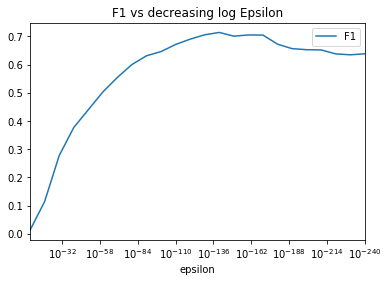

In [142]:
EpsF1df.plot.line("epsilon","F1")
plt.xscale('log')
plt.xlim(1e-10, 1e-240)
plt.title("F1 vs decreasing log Epsilon")
plt.show()

In [143]:
eps = EpsF1df.loc[EpsF1df['F1'].idxmax()]['epsilon']

print("epsilon ", eps)
print("_"*50)
pred = (x<=eps)
CM = confusion_matrix(y_test,pred)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

print(CM)
print("_"*50)
print("TP ", tp)
print("FP ", fp)
print("TN ", tn)
print("FN ", fn)

epsilon  1e-140
__________________________________________________
[[74820   180]
 [  119   373]]
__________________________________________________
TP  373
FP  180
TN  74820
FN  119


In [147]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize =False):
    
    import itertools
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    
    if cmap is None:
        
        cmap = plt.get_cmap('Blues')
        
    
    plt.figure(figsize = (8,6))
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        
        if normalize:
            
            plt.text(j,i, "{:0.4f}".format(cm[i,j]),
                    horizontalalignment = "center",
                     color = "white" if cm[i,j] > thresh else "black")
            
        else:
            plt.text(j,i, "{:,}".format(cm[i,j]),
                    horizontalalignment = "center",
                    color = "white" if cm[i,j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy = {:0.4f}; misclass = {:0.4f}'.format(accuracy, misclass))
    plt.show()

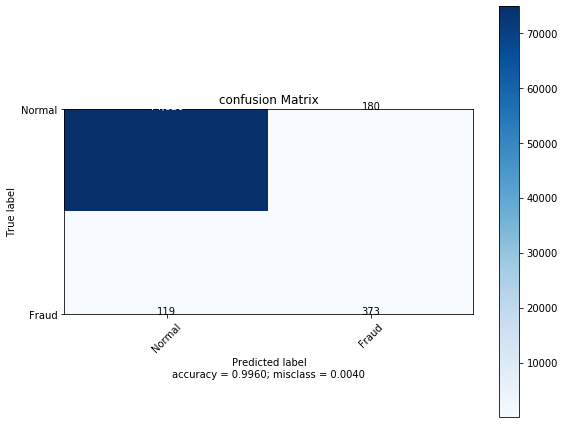

In [148]:
plot_confusion_matrix(CM,
                     normalize = False,
                     target_names = ['Normal', 'Fraud'],
                     title = "confusion Matrix")

In [149]:
# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test,pred, average='binary')
print("precision ", round((precision), 3))
print("recall ", round((recall), 3))
print("F1 score on Test", round((fbeta_score), 3))

precision  0.675
recall  0.758
F1 score on Test 0.714


In [150]:
data = dfRaw.copy()
print("Before PCA")
print(data.shape)
print("After PCA")

Before PCA
(284807, 31)
After PCA


In [151]:
pca = PCA(n_components=0.999999)

In [152]:
pca

PCA(n_components=0.999999)

In [153]:
all_cols = list(data)[:]

In [154]:
pca_columns = list(data)[:-1]

In [155]:
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]

In [156]:
Xcopy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [157]:
XcopyALL

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [158]:
dataPostPCA = pca.fit_transform(Xcopy)

In [159]:
dataPostPCA

array([[ 9.48138629e+04,  5.59794671e+01],
       [ 9.48138546e+04, -9.09536597e+01],
       [ 9.48128757e+04,  2.85024840e+02],
       ...,
       [-7.79741415e+04, -1.61186800e+01],
       [-7.79741447e+04, -7.39987151e+01],
       [-7.79781331e+04,  1.33004366e+02]])

In [160]:
OnlyClass = data['Class'].values.reshape(-1,1)

In [162]:
OnlyClass.shape

(284807, 1)

In [171]:
len(OnlyClass[OnlyClass == 0])

284315

In [172]:
len(OnlyClass[OnlyClass == 1])

492

In [173]:
data = np.concatenate((dataPostPCA, OnlyClass), axis = 1)

In [174]:
data

array([[ 9.48138629e+04,  5.59794671e+01,  0.00000000e+00],
       [ 9.48138546e+04, -9.09536597e+01,  0.00000000e+00],
       [ 9.48128757e+04,  2.85024840e+02,  0.00000000e+00],
       ...,
       [-7.79741415e+04, -1.61186800e+01,  0.00000000e+00],
       [-7.79741447e+04, -7.39987151e+01,  0.00000000e+00],
       [-7.79781331e+04,  1.33004366e+02,  0.00000000e+00]])

In [175]:
data = pd.DataFrame(data, columns = [0,1, 'Class'])

In [176]:
data.head()

,0,1,Class
0,94813.862881,55.979467,0.0
1,94813.854640,-90.953660,0.0
2,94812.875662,285.024840,0.0
3,94812.861396,29.859853,0.0
4,94811.858408,-23.652028,0.0


In [178]:
normal_data = data.loc[data["Class"]==0]
fraud_data = data.loc[data["Class"]==1]

In [179]:
print(data.shape)
print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)
print("Percent fraud ", round(100*492/284807, 4),"%")

(284807, 3)
data  (284807, 3)
normal_data  (284315, 3)
fraud_data  (492, 3)
Percent fraud  0.1727 %


In [180]:
postPCA = pd.DataFrame(data)

In [181]:
postPCA.head()

,0,1,Class
0,94813.862881,55.979467,0.0
1,94813.854640,-90.953660,0.0
2,94812.875662,285.024840,0.0
3,94812.861396,29.859853,0.0
4,94811.858408,-23.652028,0.0


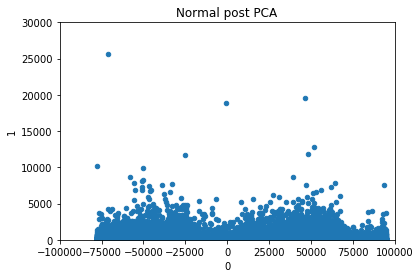

In [182]:
postPCA.plot.scatter(0,1)
plt.xlim(-100000, 100000)
plt.ylim(0, 30000)
plt.title("Normal post PCA")
plt.show()

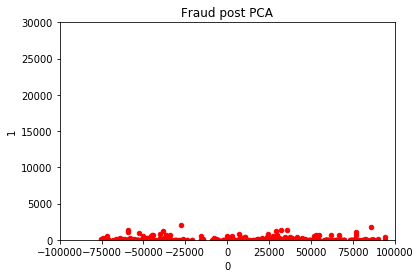

In [183]:
postPCA = pd.DataFrame(fraud_data)
postPCA.plot.scatter(0,1, c='r')
plt.xlim(-100000, 100000)
plt.ylim(0, 30000)
plt.title("Fraud post PCA")
plt.show()

In [184]:
normal_data = normal_data.drop('Class', axis=1)
fraud_data = fraud_data.drop('Class', axis=1)

In [185]:
x, y = np.mgrid[-100000:100000:100, -1000:3000:100] 
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean=np.mean(normal_data,axis=0),
                         cov=np.cov(normal_data.T)) # mean and covariance matrix for 2 dims dataset

In [190]:
rv.mean

array([-24.34268619,  -0.05724375])

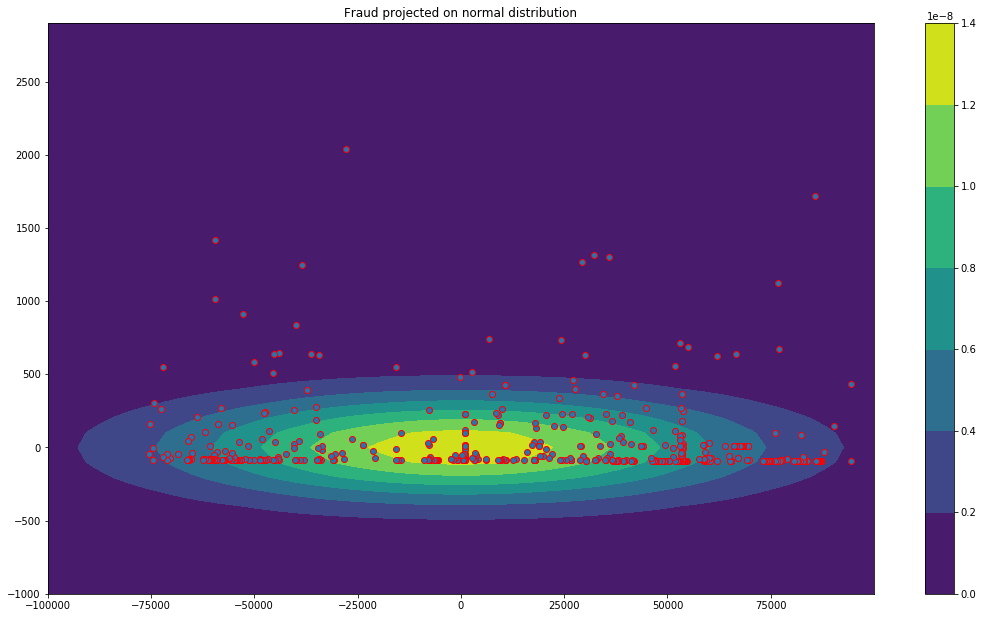

In [191]:
fig, ax = plt.subplots()
cs = ax.contourf(x, y, rv.pdf(pos))
cbar = fig.colorbar(cs)
plt.title("Fraud projected on normal distribution")
plt.scatter(fraud_data[0], fraud_data[1], edgecolor='r')
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(18.5,10.5)
plt.show()

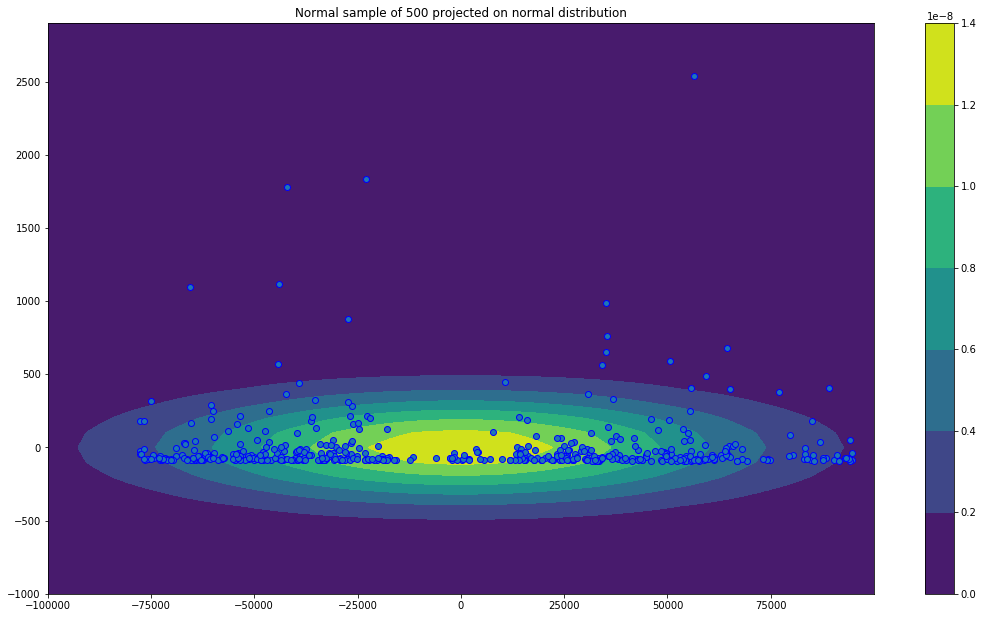

In [193]:
#mal data
# Reducing from 30 dims to 2 - helps with the visualization but surely doesn't help with separating the Fraud from the Normal

SampleNormal = normal_data.sample(500)

x, y = np.mgrid[-100000:100000:100, -1000:3000:100] 
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean=np.mean(normal_data,axis=0), cov=np.cov(normal_data.T)) # mean and covariance matrix for 2 dims dataset

fig, ax = plt.subplots()
cs = ax.contourf(x, y, rv.pdf(pos))
cbar = fig.colorbar(cs)
plt.title("Normal sample of 500 projected on normal distribution")
plt.scatter(SampleNormal[0],SampleNormal[1], edgecolor="b") # Location on chart of the anomaly points
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [194]:
data = dfRaw.copy()

print("Before PCA")
print(data.shape)
print("AFTER PCA")

pca = PCA(n_components = 0.999999) 

all_cols = list(data)[:] 
pca_columns = list(data)[:-1] 
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
dataPostPCA = pca.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((dataPostPCA, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = [0,1,'Class'])

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

print(data.shape)
print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)
print("Percent fraud ", round(100*492/284807, 4),"%")

Before PCA
(284807, 31)
AFTER PCA
(284807, 3)
data  (284807, 3)
normal_data  (284315, 3)
fraud_data  (492, 3)
Percent fraud  0.1727 %


In [204]:
normal_pca_data = normal_data.drop('Class',1)
fraud_pca_data = fraud_data.drop('Class',1)

num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

#X_valid = np.concatenate([shuffled_data[-2*num_test:-num_test], fraud_pca_data[:246]])
#y_valid = np.concatenate([np.zeros(num_test), np.ones(246)])

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])

print("normal_pca_data ", normal_pca_data.shape)
print("fraud_pca_data", fraud_pca_data.shape)
print("Fraud data only in Test with NONE in the training")
print("X_train ", X_train.shape)
#print("X_valid ", X_valid.shape)
#print("y_valid ", y_valid.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

normal_pca_data  (284315, 2)
fraud_pca_data (492, 2)
Fraud data only in Test with NONE in the training
X_train  (209315, 2)
X_test  (75492, 2)
y_test  (75492,)


In [205]:
p = multivariate_normal(mean=np.mean(X_train,axis=0), cov=np.cov(X_train.T))

In [206]:
x = p.pdf(X_train)
print("max prob of x on X_train", max(x))
print("mean prob of x on X_train", np.mean(x))
print('-' * 60)
MyTrain = np.mean(x)

max prob of x on X_train 1.369378776781379e-08
mean prob of x on X_train 8.169867741057095e-09
------------------------------------------------------------


In [207]:
x = p.pdf(X_test)
print("max prob of x on X_test", max(x))
print("mean prob of x on X_test", np.mean(x))
print('-' * 60)
MyTest = np.mean(x)

max prob of x on X_test 1.3692169625512559e-08
mean prob of x on X_test 8.157129019234439e-09
------------------------------------------------------------


In [208]:
x = p.pdf(fraud_pca_data)
print("max prob of x on fraud_pca_data", max(x))
print("mean prob of x on fraud_pca_data", np.mean(x))
print('-' * 60)

print('Difference between mean prob of Train vs Test ', MyTrain - MyTest)

max prob of x on fraud_pca_data 1.368315208328899e-08
mean prob of x on fraud_pca_data 7.468033220044315e-09
------------------------------------------------------------
Difference between mean prob of Train vs Test  1.2738721822656689e-11


In [209]:
x = p.pdf(X_test)

EpsF1 = []

epsilons = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]

for e in range(len(epsilons)):
    eps = epsilons[e]
    pred = (x <= eps)
    f = f1_score(y_test, pred, average='binary')
    #print("F1 score on test", round(f,4), " with epsilon ", eps)
    EpsF1.append([eps, round(f,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['epsilon', 'F1'])
EpsF1df.head()

,epsilon,F1
0,0.10000,0.013
1,0.01000,0.013
2,0.00100,0.013
3,0.00010,0.013
4,0.00001,0.013


In [210]:
EpsF1df

,epsilon,F1
0,1.000000e-01,0.0130
1,1.000000e-02,0.0130
2,1.000000e-03,0.0130
3,1.000000e-04,0.0130
4,1.000000e-05,0.0130
5,1.000000e-06,0.0130
6,1.000000e-07,0.0130
7,1.000000e-08,0.0141
8,1.000000e-09,0.0217
9,1.000000e-10,0.0141


In [211]:
EpsF1df.loc[EpsF1df['F1'].idxmax()]

epsilon    1.000000e-09
F1         2.170000e-02
Name: 8, dtype: float64

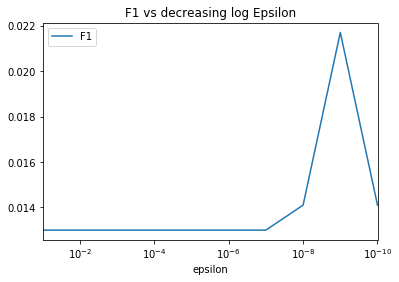

In [212]:
EpsF1df.plot.line("epsilon","F1")
plt.xscale('log')
plt.xlim(1e-1, 1e-10)
plt.title("F1 vs decreasing log Epsilon")
plt.show()

In [213]:
data = dfRaw.copy()
scl = StandardScaler()
all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)
print("Percent fraud ", round(100*492/284807, 4),"%")

data  (284807, 31)
normal_data  (284315, 31)
fraud_data  (492, 31)
Percent fraud  0.1727 %


In [214]:
normal_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0.0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0.0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0.0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0.0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0.0


In [215]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-1.988034,-1.180495,1.182090,-1.061730,2.823647,-0.378330,-1.070764,-2.051091,1.165200,-2.521403,...,0.704175,-0.048297,-0.744982,0.528689,0.085404,0.368789,0.646988,-0.434061,-0.353229,1.0
623,-1.986644,-1.553864,-1.912006,0.717864,1.616427,0.985192,-0.799255,0.263177,-0.056762,-0.246628,...,0.900852,0.600079,2.203452,-0.485107,0.536755,-0.301439,-0.626247,0.108349,1.761758,1.0
4920,-1.902623,-1.175963,1.065368,-0.237259,1.645808,-0.595277,-0.056886,0.454550,-0.334195,-0.216864,...,-0.400486,-1.284816,0.276601,-0.144192,-0.299484,-1.125256,0.098025,-0.463607,0.606031,1.0
6108,-1.849472,-2.245363,0.822602,-1.710035,1.892684,-0.817341,-1.280925,-2.826143,-0.208295,-0.225524,...,0.780880,0.243858,-0.698535,-0.088339,0.484205,-1.363443,-2.049233,2.573820,-0.117342,1.0
6329,-1.838248,0.630132,1.828699,-2.838971,3.342686,2.625768,-1.019123,1.385059,-0.415589,-1.167689,...,-0.516074,-0.970347,-1.051798,-2.695722,2.856257,1.175376,-0.024815,0.444715,-0.349231,1.0


In [216]:
# Check values are centered around 0 after normalization

print("data['Time'].mean()  ", data['Time'].mean())
print("data['Amount'].mean()  ", data['Amount'].mean())

data['Time'].mean()   -1.0503786406559267e-14
data['Amount'].mean()   3.202236423019539e-16


In [217]:
normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

In [218]:
num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

In [219]:
shuffled_data

array([[-1.6911589 ,  0.66619881,  0.00709956, ..., -0.16408763,
        -0.02754838, -0.293458  ],
       [ 0.69129248,  0.65498349, -0.5552245 , ..., -0.13243933,
         0.12380107,  1.15264977],
       [ 1.00745614,  0.99463714, -0.93390622, ..., -0.08195241,
        -0.12431485,  0.16252373],
       ...,
       [-0.57569962, -0.13754235,  0.66677563, ...,  0.60458119,
         0.26624575, -0.34247454],
       [-0.51168353,  0.60116726,  0.1319504 , ..., -0.03125221,
         0.04621687, -0.31328851],
       [ 1.10613357, -0.64937062, -0.47370215, ..., -0.03862883,
        -0.45376174, -0.22936868]])

In [220]:
X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])

In [221]:
print("normal_pca_data ", normal_pca_data.shape)
print("fraud_pca_data", fraud_pca_data.shape)
print("Fraud data only in Test with NONE in the training")
print("X_train ", X_train.shape)
#print("X_valid ", X_valid.shape)
#print("y_valid ", y_valid.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

normal_pca_data  (284315, 30)
fraud_pca_data (492, 30)
Fraud data only in Test with NONE in the training
X_train  (209315, 30)
X_test  (75492, 30)
y_test  (75492,)


In [222]:
input_dim = X_train.shape[1]
encoding_dim =14

In [226]:
normal_pca_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [224]:
X_train

array([[-1.6911589 ,  0.66619881,  0.00709956, ..., -0.16408763,
        -0.02754838, -0.293458  ],
       [ 0.69129248,  0.65498349, -0.5552245 , ..., -0.13243933,
         0.12380107,  1.15264977],
       [ 1.00745614,  0.99463714, -0.93390622, ..., -0.08195241,
        -0.12431485,  0.16252373],
       ...,
       [-0.57569962, -0.13754235,  0.66677563, ...,  0.60458119,
         0.26624575, -0.34247454],
       [-0.51168353,  0.60116726,  0.1319504 , ..., -0.03125221,
         0.04621687, -0.31328851],
       [ 1.10613357, -0.64937062, -0.47370215, ..., -0.03862883,
        -0.45376174, -0.22936868]])

In [223]:
input_dim

30

In [229]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation = "tanh",
               activity_regularizer = regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim/2), activation = "relu")(encoder)

decoder = Dense(int(encoding_dim/2), activation = "tanh")(encoder)

decoder = Dense(int(encoding_dim), activation = "tanh")(encoder)

decoder = Dense(input_dim, activation = "relu")(decoder)

autoencoder = Model(inputs = input_layer, outputs=decoder)

In [230]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 14)                434       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_7 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_8 (Dense)              (None, 30)                450       
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [231]:
nb_epoch = 10
batch_size = 32

In [233]:
autoencoder.compile(optimizer = 'adam',
                  loss= 'mean_squared_error',
                  metrics = ['accuracy'])

In [234]:
checkpointer = ModelCheckpoint(filepath = 'model.h5',
                              verbose = 0,
                              save_best_only=True)

In [235]:
tensorboard = TensorBoard(log_dir='./logs',
                         histogram_freq = 0,
                         write_graph=True,
                         write_images=True)

In [237]:
history = autoencoder.fit(X_train, X_train,
                         epochs = nb_epoch,
                         batch_size = batch_size,
                         shuffle = True,
                         validation_data = (X_test, X_test),
                         verbose = 1,
                         callbacks=[checkpointer, tensorboard]).history

Epoch 1/10
6542/6542 [==============================] - 13s 2ms/step - loss: 0.7612 - accuracy: 0.4237 - val_loss: 0.8641 - val_accuracy: 0.4819
Epoch 2/10
6542/6542 [==============================] - 12s 2ms/step - loss: 0.7067 - accuracy: 0.5090 - val_loss: 0.8341 - val_accuracy: 0.5304
Epoch 3/10
6542/6542 [==============================] - 12s 2ms/step - loss: 0.6908 - accuracy: 0.5441 - val_loss: 0.8222 - val_accuracy: 0.5541
Epoch 4/10
6542/6542 [==============================] - 12s 2ms/step - loss: 0.6820 - accuracy: 0.5588 - val_loss: 0.8139 - val_accuracy: 0.5580
Epoch 5/10
6542/6542 [==============================] - 13s 2ms/step - loss: 0.6757 - accuracy: 0.5637 - val_loss: 0.8091 - val_accuracy: 0.5638
Epoch 6/10
6542/6542 [==============================] - 13s 2ms/step - loss: 0.6717 - accuracy: 0.5704 - val_loss: 0.8076 - val_accuracy: 0.5612
Epoch 7/10
6542/6542 [==============================] - 12s 2ms/step - loss: 0.6683 - accuracy: 0.5748 - val_loss: 0.8031 - val_ac

In [240]:
history

{'loss': [0.7611609101295471,
  0.7067391872406006,
  0.6907649040222168,
  0.6820350885391235,
  0.6757233142852783,
  0.6717345714569092,
  0.6682637929916382,
  0.6665865182876587,
  0.6644201874732971,
  0.6627299785614014],
 'accuracy': [0.423734575510025,
  0.509012758731842,
  0.5440555810928345,
  0.5588275790214539,
  0.5636910796165466,
  0.5703939199447632,
  0.5748226642608643,
  0.5777273774147034,
  0.579853355884552,
  0.5804839730262756],
 'val_loss': [0.8641413450241089,
  0.8340902924537659,
  0.8221588730812073,
  0.8139132857322693,
  0.8090829849243164,
  0.8076151013374329,
  0.8030800819396973,
  0.8001114726066589,
  0.7982321977615356,
  0.7984481453895569],
 'val_accuracy': [0.48185238242149353,
  0.5303608179092407,
  0.5540587306022644,
  0.5580193996429443,
  0.5637683272361755,
  0.5611587762832642,
  0.5766968727111816,
  0.5815715789794922,
  0.5758755803108215,
  0.577239990234375]}

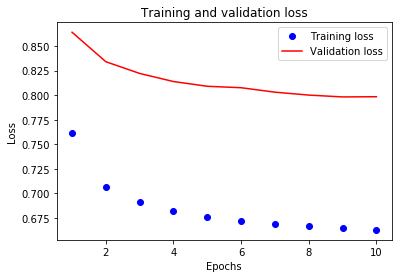

In [243]:
plt.clf()
history_dict = history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss'])+1))
plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation loss")
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [245]:
history_dict

{'loss': [0.7611609101295471,
  0.7067391872406006,
  0.6907649040222168,
  0.6820350885391235,
  0.6757233142852783,
  0.6717345714569092,
  0.6682637929916382,
  0.6665865182876587,
  0.6644201874732971,
  0.6627299785614014],
 'accuracy': [0.423734575510025,
  0.509012758731842,
  0.5440555810928345,
  0.5588275790214539,
  0.5636910796165466,
  0.5703939199447632,
  0.5748226642608643,
  0.5777273774147034,
  0.579853355884552,
  0.5804839730262756],
 'val_loss': [0.8641413450241089,
  0.8340902924537659,
  0.8221588730812073,
  0.8139132857322693,
  0.8090829849243164,
  0.8076151013374329,
  0.8030800819396973,
  0.8001114726066589,
  0.7982321977615356,
  0.7984481453895569],
 'val_accuracy': [0.48185238242149353,
  0.5303608179092407,
  0.5540587306022644,
  0.5580193996429443,
  0.5637683272361755,
  0.5611587762832642,
  0.5766968727111816,
  0.5815715789794922,
  0.5758755803108215,
  0.577239990234375]}

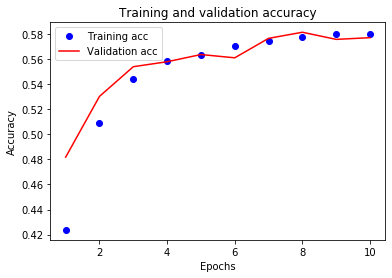

In [249]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, (len(history_dict['accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [250]:
autoencoder = load_model('model.h5')

In [251]:
y_train = np.zeros(X_train.shape[0])

In [252]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [253]:
predictions = autoencoder.predict(X_train)
predictions.shape

(209315, 30)

In [254]:
predictions

array([[0.        , 0.5546087 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.85396   , 0.69082296, 0.        , ..., 0.        , 0.        ,
        0.38698465],
       [0.9127186 , 0.8302368 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.5024686 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.61281455, 0.21671802, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [255]:
mse = np.mean(np.power(X_train-predictions,2), axis = 1)

In [256]:
mse

array([0.54299183, 0.49978333, 0.29319428, ..., 0.23686247, 0.07581462,
       0.73232293])

In [257]:
error_df = pd.DataFrame({'reconstruction_error':mse, 'true_class':y_train})

In [258]:
error_df 

,reconstruction_error,true_class
0,0.542992,0.0
1,0.499783,0.0
2,0.293194,0.0
3,0.355167,0.0
4,0.864895,0.0
...,...,...
209310,0.883510,0.0
209311,0.489811,0.0
209312,0.236862,0.0
209313,0.075815,0.0


In [259]:
print(error_df.shape[0], ' rows')
print('mean error of recon on TRAIN', round(error_df.reconstruction_error.mean(),2))
print('std error of recon on TRAIN', round(error_df.reconstruction_error.std(),2))

209315  rows
mean error of recon on TRAIN 0.66
std error of recon on TRAIN 2.43


In [260]:
predictions = autoencoder.predict(X_test)


In [262]:
predictions.shape

(75492, 30)

In [263]:
mse = np.mean(np.power(X_test-predictions, 2), axis = 1)

In [264]:
mse

array([0.32314717, 0.2902808 , 0.42442717, ..., 3.36055205, 6.5084601 ,
       0.47295058])

In [265]:
error_df = pd.DataFrame({'reconstruction_error':mse, 'true_class':y_test})
print(error_df.shape[0], ' rows')
print('mean error of recon on TEST', round(error_df.reconstruction_error.mean(),2))
print('std error of recon on TEST', round(error_df.reconstruction_error.std(),2))

75492  rows
mean error of recon on TEST 0.8
std error of recon on TEST 3.78


In [266]:
y_Fraud = np.ones(fraud_pca_data.shape[0])
y_Fraud.shape

(492,)

In [268]:
predictions = autoencoder.predict(fraud_pca_data)
predictions.shape

(492, 30)

In [269]:
predictions

array([[0.        , 0.00293636, 0.07225624, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.3426495 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.20318905, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6646078 , 0.20676565, 0.12038758, ..., 0.        , 0.        ,
        0.        ],
       [0.32226455, 0.        , 0.27938727, ..., 0.        , 0.        ,
        0.        ],
       [1.3047352 , 1.0446945 , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [270]:
mse = np.mean(np.power(fraud_pca_data - predictions,2), axis = 1)

In [271]:
error_df = pd.DataFrame({'reconstruction_error':mse,
                        'true_class':y_Fraud})

In [272]:
error_df

,reconstruction_error,true_class
541,3.248629,1.0
623,1.416557,1.0
4920,4.441153,1.0
6108,18.992428,1.0
6329,5.271590,1.0
...,...,...
279863,6.670510,1.0
280143,3.669838,1.0
280149,3.360552,1.0
281144,6.508460,1.0


In [273]:
print(error_df.shape[0], ' rows')
print('mean error of recon on FRAUD', round(error_df.reconstruction_error.mean(),2))
print('std error of recon on FRAUD', round(error_df.reconstruction_error.std(),2))

492  rows
mean error of recon on FRAUD 21.55
std error of recon on FRAUD 27.56


In [274]:
predictions = autoencoder.predict(X_test)
predictions.shape

(75492, 30)

In [275]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
print(error_df.shape[0], ' rows')
print('mean error of recon on TEST', round(error_df.reconstruction_error.mean(),2))
print('std error of recon on TEST', round(error_df.reconstruction_error.std(),2))

75492  rows
mean error of recon on TEST 0.8
std error of recon on TEST 3.78


In [276]:
ReconError = 4.0

In [277]:
pred = [1 if e > ReconError else 0 for e in error_df.reconstruction_error.values]

In [278]:
len(pred)

75492

In [279]:
f = f1_score(y_test, pred, average = 'binary')

In [280]:
print("F1 score on test", round(f,4), " with reconstruction error ", ReconError)

F1 score on test 0.4347  with reconstruction error  4.0


In [281]:
minRE = 1
maxRE = 50

In [282]:
EpsF1 = []

In [283]:
for TryRE in range(minRE, maxRE):
    pred = [1 if e > TryRE else 0 for e in error_df.reconstruction_error.values]
    
    f = f1_score(y_test, pred, average = 'binary')
    
    EpsF1.append([TryRE, round(f,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['ReconError', 'F1'])

In [284]:
EpsF1df

,ReconError,F1
0,1,0.1064
1,2,0.2685
2,3,0.3700
3,4,0.4347
4,5,0.4488
5,6,0.4788
6,7,0.5038
7,8,0.4996
8,9,0.4861
9,10,0.4748


In [285]:
EpsF1df.loc[EpsF1df['F1'].idxmax()]

ReconError    7.0000
F1            0.5038
Name: 6, dtype: float64

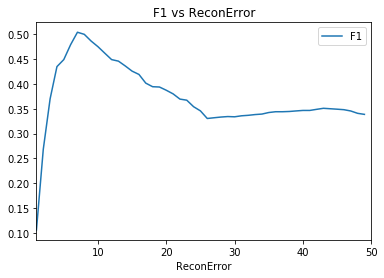

In [286]:
EpsF1df.plot.line("ReconError", "F1")
plt.xlim(1, 50)
plt.title("F1 vs ReconError")
plt.show()

In [287]:
data = dfRaw.copy()
scl = StandardScaler()
all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fraud_data ", fraud_data.shape)
print("Percent fraud ", round(100*492/284807, 4),"%")

data  (284807, 31)
normal_data  (284315, 31)
fraud_data  (492, 31)
Percent fraud  0.1727 %


In [288]:
# CREATE the TRAIN and TEST sets
# Fraud data is ONLY in TEST - not in TRAIN

normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

num_test = 20000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])

print("normal_pca_data ", normal_pca_data.shape)
print("fraud_pca_data", fraud_pca_data.shape)
print("Fraud data only in Test with NONE in the training")
print("X_train ", X_train.shape)
#print("X_valid ", X_valid.shape)
#print("y_valid ", y_valid.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

normal_pca_data  (284315, 30)
fraud_pca_data (492, 30)
Fraud data only in Test with NONE in the training
X_train  (264315, 30)
X_test  (20492, 30)
y_test  (20492,)


In [289]:
X_inliers = shuffled_data[-num_test:]
X_outliers = fraud_pca_data[:]
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

PercFraud = n_outliers / X_test.shape[0]
PercFraud

print('X_inliers ', X_inliers.shape)
print('X_outliers ', X_outliers.shape)
print('X ', X.shape)
print('n_outliers ', n_outliers)
print('percent fraud in test: ', PercFraud)

X_inliers  (20000, 30)
X_outliers  (492, 30)
X  (20492, 30)
n_outliers  492
percent fraud in test:  0.024009369510052704


In [299]:

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination = PercFraud)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_
n_errors

934

In [300]:
print('accuracy ' , round(1 - (n_errors / X.shape[0]),4))

accuracy  0.9544


In [290]:
ground_truth

array([ 1,  1,  1, ..., -1, -1, -1])

In [302]:
y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)
print(y_predDF[y_predDF[0] == -1].count())

y_predDF[y_predDF[0] == 1] =0
y_predDF[y_predDF[0] == -1] =1
print(y_predDF[y_predDF[0] ==1].count())

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

0    492
dtype: int64
0    492
dtype: int64


In [305]:
len(y_predLOF[y_predLOF ==1])

492

In [306]:
precision, recall, fbeta_score, support = precision_recall_fscore_support(y_test, 
                                                                          y_predLOF,
                                                                          average='binary')

In [307]:
print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))

precision  0.0508
recall  0.0508
F1 score on Test 0.0508


In [308]:
minRE = 500
maxRE = 1100
    
EpsF1 = []

for TryRE in range(minRE,maxRE,100):
    clf = LocalOutlierFactor(n_neighbors=TryRE, contamination = PercFraud)
    y_pred = clf.fit_predict(X)
    n_errors = (y_pred != ground_truth).sum()
    X_scores = clf.negative_outlier_factor_
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with num neighbors ", TryRE)
    EpsF1.append([TryRE, round(fbeta_score,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['NumNeighb', 'F1'])

F1 score on test 0.561  with num neighbors  500
F1 score on test 0.5915  with num neighbors  600
F1 score on test 0.6037  with num neighbors  700
F1 score on test 0.6098  with num neighbors  800
F1 score on test 0.6138  with num neighbors  900
F1 score on test 0.6037  with num neighbors  1000


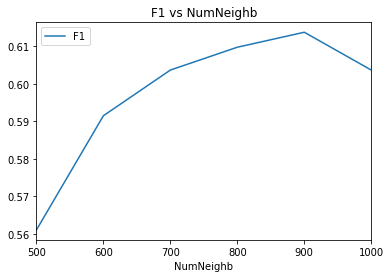

In [309]:
EpsF1df.plot.line("NumNeighb","F1")
plt.xlim(500, 1000)
plt.title("F1 vs NumNeighb")
plt.show()

In [310]:
data = dfRaw.copy()
scl = StandardScaler()
all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

# CREATE the TRAIN and TEST sets
# Fraud data is ONLY in TEST - not in TRAIN

normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])


X_inliers = shuffled_data[-num_test:]
X_outliers = fraud_pca_data[:]
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

PercFraud = n_outliers / X_test.shape[0]
PercFraud

print('X_inliers ', X_inliers.shape)
print('X_outliers ', X_outliers.shape)
print('X ', X.shape)
print('n_outliers ', n_outliers)
print('percent fraud in test: ', PercFraud)

X_inliers  (75000, 30)
X_outliers  (492, 30)
X  (75492, 30)
n_outliers  492
percent fraud in test:  0.0065172468605945


In [311]:
cov = EllipticEnvelope(support_fraction = 0.994, contamination = PercFraud)

y_pred = cov.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
n_errors

196

In [313]:
y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)

y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))

precision  0.8008
recall  0.8008
F1 score on Test 0.8008


In [314]:
CM = confusion_matrix(y_test, y_predLOF)
tn, fp, fn, tp = confusion_matrix(y_test, y_predLOF).ravel()

print(CM)
print("_"*50)
print("TP ", tp)
print("FP ", fp)
print("TN ", tn)
print("FN ", fn)

[[74902    98]
 [   98   394]]
__________________________________________________
TP  394
FP  98
TN  74902
FN  98


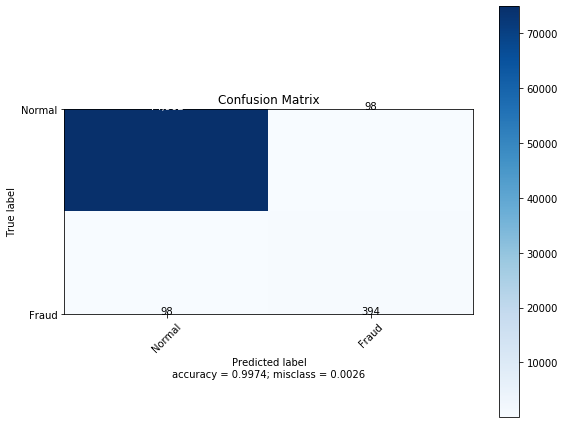

In [315]:
plot_confusion_matrix(CM, 
                      normalize    = False,
                      target_names = ['Normal', 'Fraud'],
                      title        = "Confusion Matrix")

In [316]:
# Optimize support_fraction hyper paramter for best F1

minRE = 0.95
maxRE = 0.99
    
EpsF1 = []

for TryRE in np.arange(minRE, maxRE, 0.01):
    cov = EllipticEnvelope(support_fraction = TryRE, contamination = PercFraud)
    y_pred = cov.fit_predict(X)
    n_errors = (y_pred != ground_truth).sum()
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with support_fraction ", TryRE)
    EpsF1.append([TryRE, round(fbeta_score,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['SupFrac', 'F1'])
EpsF1df.head()

F1 score on test 0.8028  with support_fraction  0.95
F1 score on test 0.8028  with support_fraction  0.96
F1 score on test 0.8028  with support_fraction  0.97
F1 score on test 0.8028  with support_fraction  0.98
F1 score on test 0.8008  with support_fraction  0.99


,SupFrac,F1
0,0.95,0.8028
1,0.96,0.8028
2,0.97,0.8028
3,0.98,0.8028
4,0.99,0.8008


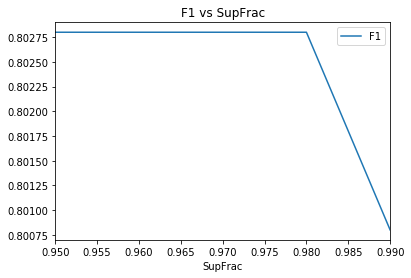

In [317]:
EpsF1df.plot.line("SupFrac","F1")
plt.xlim(minRE, maxRE)
plt.title("F1 vs SupFrac")
plt.show()

In [318]:
data = dfRaw.copy()
scl = StandardScaler()
all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

# CREATE the TRAIN and TEST sets
# Fraud data is ONLY in TEST - not in TRAIN

normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])


X_inliers = shuffled_data[-num_test:]
X_outliers = fraud_pca_data[:]
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

PercFraud = n_outliers / X_test.shape[0]
PercFraud

print('X_inliers ', X_inliers.shape)
print('X_outliers ', X_outliers.shape)
print('X ', X.shape)
print('n_outliers ', n_outliers)
print('percent fraud in test: ', PercFraud)

X_inliers  (75000, 30)
X_outliers  (492, 30)
X  (75492, 30)
n_outliers  492
percent fraud in test:  0.0065172468605945


In [319]:
%%time

isofo = IsolationForest(n_estimators = 1050, max_features = 1.0, max_samples=1.0, 
                        behaviour="new", bootstrap=False, random_state=22,
                        contamination = PercFraud)

y_pred = isofo.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
print(n_errors)

530
Wall time: 2min 29s


In [320]:
y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)

y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))

precision  0.4614
recall  0.4614
F1 score on Test 0.4614


In [321]:

minRE = 900
maxRE = 1150
    
EpsF1 = []

for TryRE in np.arange(minRE, maxRE, 50):
    isofo = IsolationForest(n_estimators = TryRE, max_features = 1.0, max_samples=1.0, 
                        behaviour="new", bootstrap=False, random_state=22,
                        contamination = PercFraud)

    y_pred = isofo.fit_predict(X)
    n_errors = (y_pred != ground_truth).sum()
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with num_estimators ", TryRE)
    EpsF1.append([TryRE, round(fbeta_score,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['NumEstim', 'F1'])
EpsF1df.head()

F1 score on test 0.4593  with num_estimators  900
F1 score on test 0.4573  with num_estimators  950
F1 score on test 0.4573  with num_estimators  1000
F1 score on test 0.4614  with num_estimators  1050
F1 score on test 0.4614  with num_estimators  1100


,NumEstim,F1
0,900,0.4593
1,950,0.4573
2,1000,0.4573
3,1050,0.4614
4,1100,0.4614


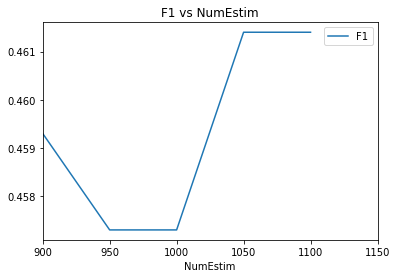

In [322]:
EpsF1df.plot.line("NumEstim","F1")
plt.xlim(minRE, maxRE)
plt.title("F1 vs NumEstim")
plt.show()

In [323]:
data = dfRaw.copy()
scl = StandardScaler()
all_cols = list(data)[:] 
pca_columns = list(data)[:-1] # all cols without Class
Xcopy = data[pca_columns]
XcopyALL = data[all_cols]
Xscaled = scl.fit_transform(Xcopy)
OnlyClass = data['Class'].values.reshape(-1,1)
data = np.concatenate((Xscaled, OnlyClass), axis=1)
data = pd.DataFrame(data, columns = XcopyALL.columns)

normal_data = data.loc[data["Class"] == 0]
fraud_data = data.loc[data["Class"] == 1]

# CREATE the TRAIN and TEST sets
# Fraud data is ONLY in TEST - not in TRAIN

normal_pca_data = normal_data[pca_columns]
fraud_pca_data = fraud_data[pca_columns]

num_test = 75000
shuffled_data = normal_pca_data.sample(frac=1, random_state=1960)[:-num_test].values
X_train = shuffled_data

X_test = np.concatenate([shuffled_data[-num_test:], fraud_pca_data[:]])
y_test = np.concatenate([np.zeros(num_test), np.ones(492)])


X_inliers = shuffled_data[-num_test:]
X_outliers = fraud_pca_data[:]
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

PercFraud = n_outliers / X_test.shape[0]
PercFraud

print('X_inliers ', X_inliers.shape)
print('X_outliers ', X_outliers.shape)
print('X ', X.shape)
print('n_outliers ', n_outliers)
print('percent fraud in test: ', PercFraud)

X_inliers  (75000, 30)
X_outliers  (492, 30)
X  (75492, 30)
n_outliers  492
percent fraud in test:  0.0065172468605945


In [324]:
%%time

OneSVM = OneClassSVM(nu = PercFraud)

y_pred = OneSVM.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
print(n_errors)

944
Wall time: 15.8 s


In [325]:
y_predLOF = y_pred.copy()
y_predDF = pd.DataFrame(y_predLOF)

y_predDF[y_predDF[0] == 1] = 0
y_predDF[y_predDF[0] == -1] = 1

y_predLOF = y_predDF.values
y_predLOF = np.ravel(y_predLOF)

# F1 Score
#print("F1 score", round(f1_score(y_valid,pred, average='binary'), 4))
precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
print("precision ", round((precision), 4))
print("recall ", round((recall), 4))
print("F1 score on Test", round((fbeta_score), 4))

precision  0.1715
recall  0.2398
F1 score on Test 0.2


In [326]:
# Optimize nu hyper paramter for best F1

minRE = 0.017
maxRE = 0.022
    
EpsF1 = []

for TryRE in np.arange(minRE, maxRE, 0.001):
    OneSVM = OneClassSVM(nu = TryRE)
    y_pred = OneSVM.fit_predict(X)
    n_errors = (y_pred != ground_truth).sum()
    
    y_predLOF = y_pred.copy()
    y_predDF = pd.DataFrame(y_predLOF)
    
    y_predDF[y_predDF[0] == 1] = 0
    y_predDF[y_predDF[0] == -1] = 1
    
    y_predLOF = y_predDF.values
    y_predLOF = np.ravel(y_predLOF)
    
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(y_test, y_predLOF, average='binary')
    
    print("F1 score on test", round(fbeta_score,4), " with nu ", TryRE)
    EpsF1.append([TryRE, round(fbeta_score,4)])
    
EpsF1df = pd.DataFrame(EpsF1, columns = ['nu', 'F1'])
EpsF1df.head()

F1 score on test 0.2567  with nu  0.017
F1 score on test 0.2695  with nu  0.018000000000000002
F1 score on test 0.2757  with nu  0.019000000000000003
F1 score on test 0.283  with nu  0.020000000000000004
F1 score on test 0.2783  with nu  0.021000000000000005


,nu,F1
0,0.017,0.2567
1,0.018,0.2695
2,0.019,0.2757
3,0.020,0.2830
4,0.021,0.2783


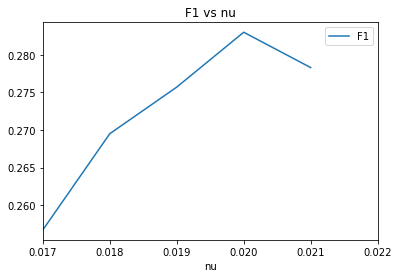

In [327]:
EpsF1df.plot.line("nu","F1")
plt.xlim(minRE, maxRE)
plt.title("F1 vs nu")
plt.show()

In [328]:
EpsF1df.loc[EpsF1df['F1'].idxmax()]

nu    0.020
F1    0.283
Name: 3, dtype: float64